# Data Preprocessing
1. Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import warnings
warnings.filterwarnings("ignore")  # Ignores all warnings

2. Loading the data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition (2).csv") # importing the data

3. Inspecting the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
pd.set_option('display.max_columns', None)  # using this for pandas to display all columns
df.describe()   #checking the descriptive statistics of the data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Comments:
1) Data are complete (1470 observations)
1) High range in **DailyRate, HourlyRate, MonthlyIncome, DistanceFromHome** but this is not something we do not expect.
2) Everyone had increase in the past year (Minimum 11%)
3) Only 3 and 4 Performance Rating Scores were found. Nobody below 3.
4) **StandardHours** does not provide a lot of info

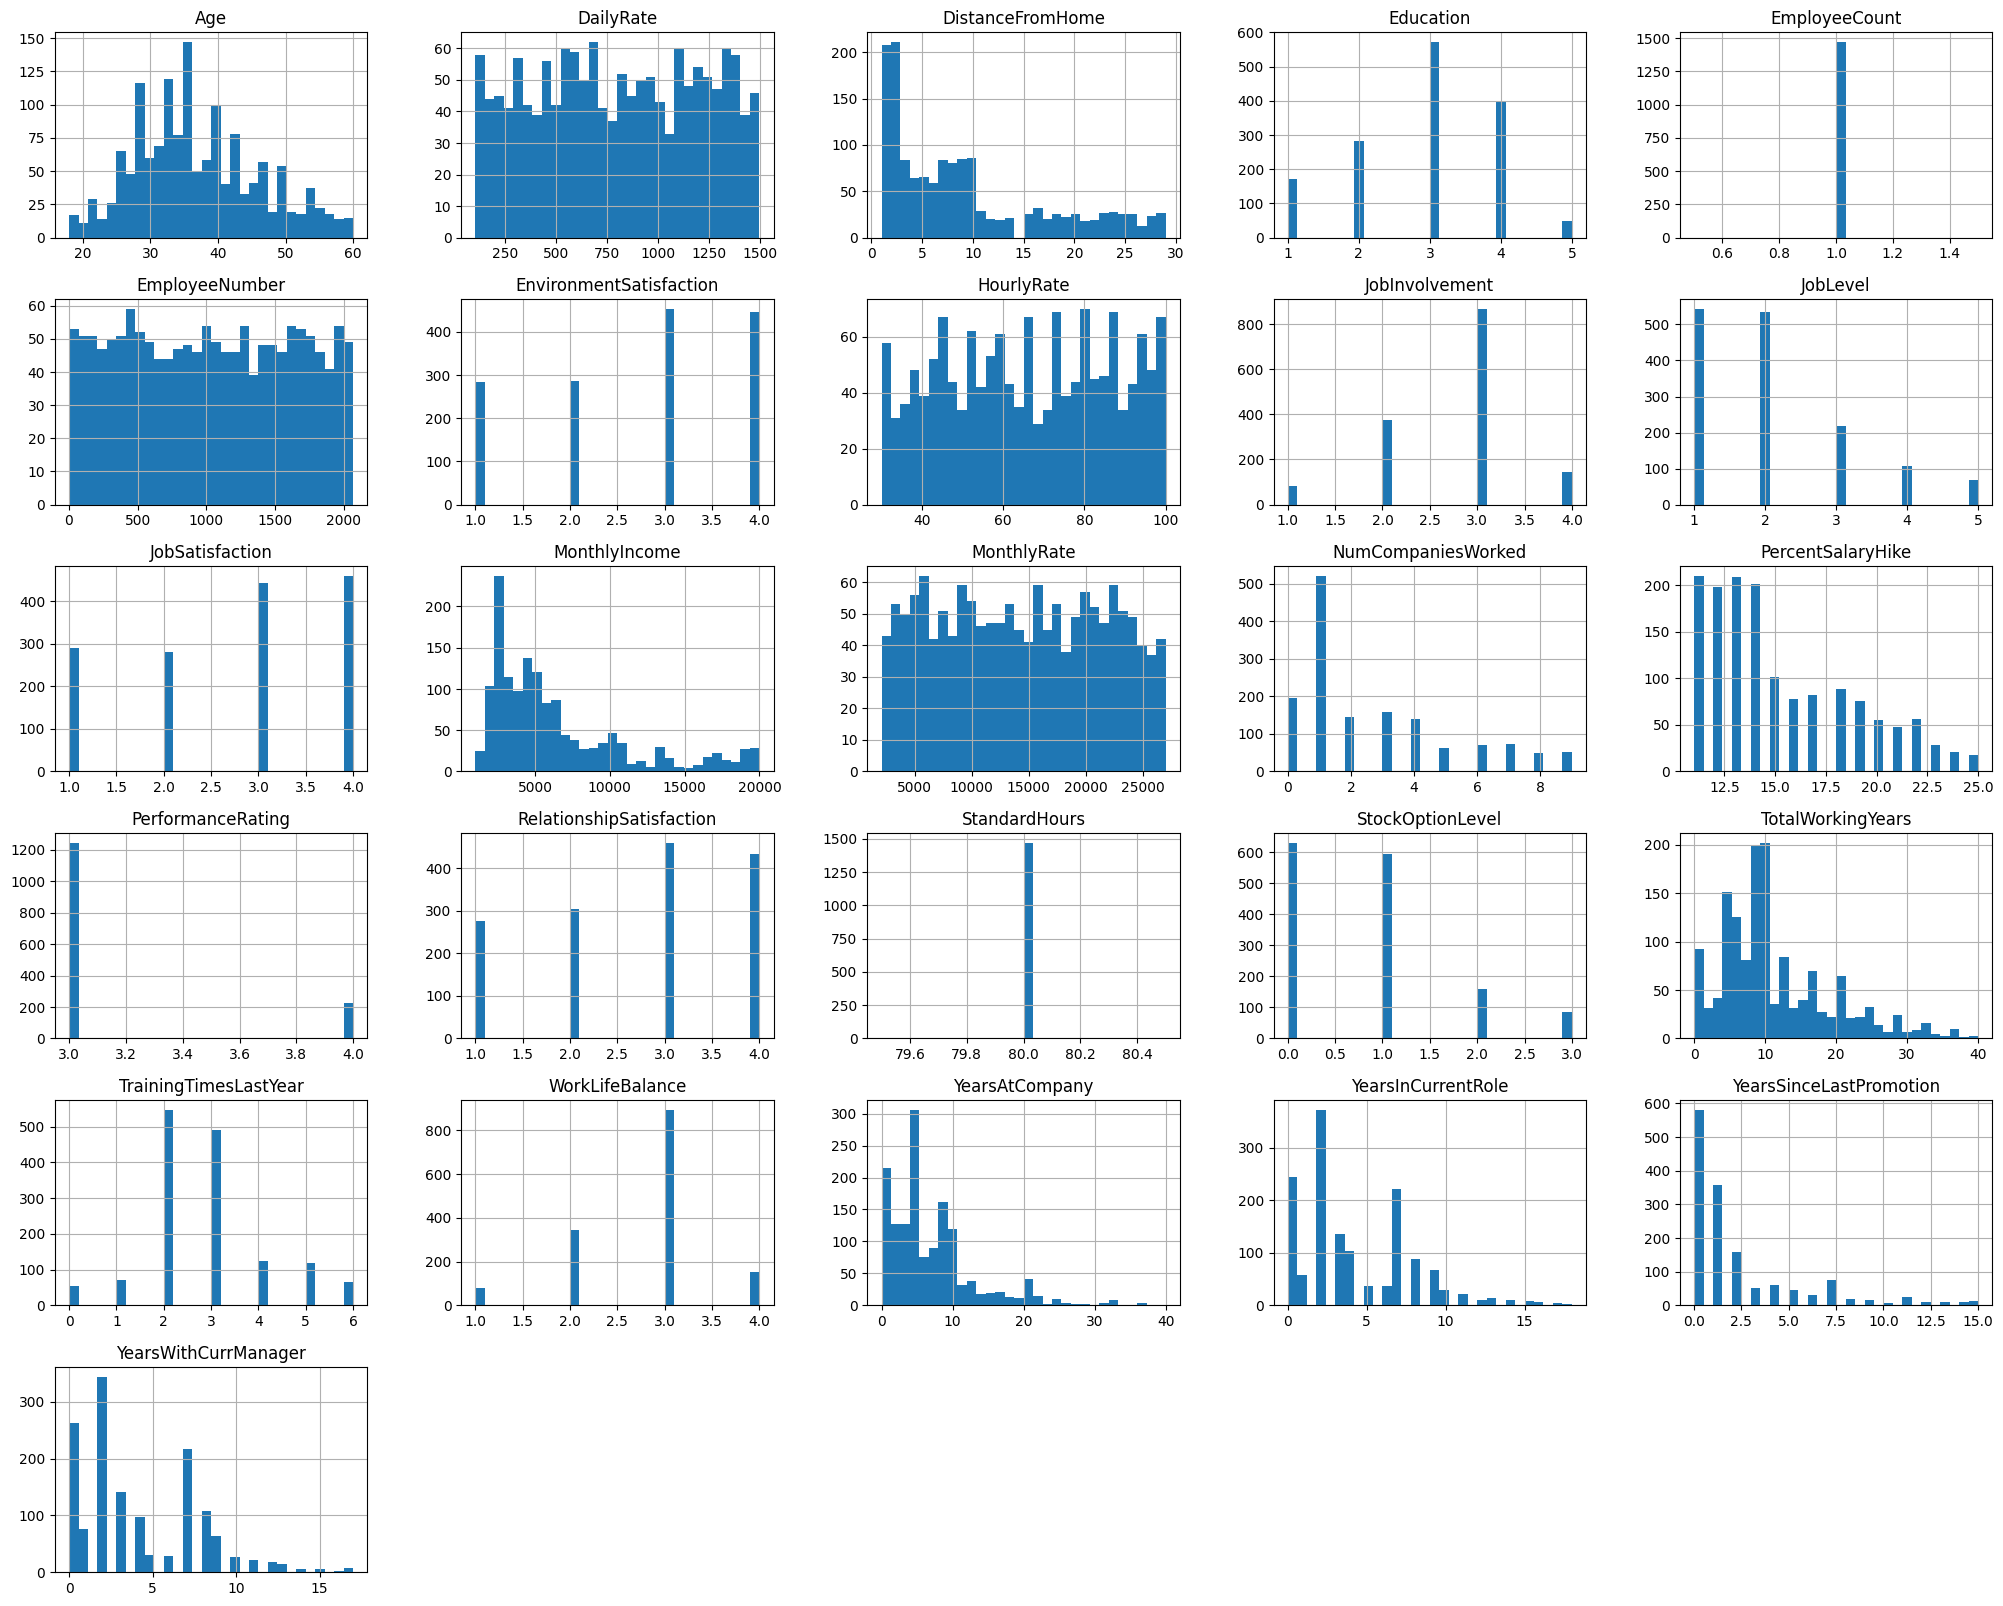

In [5]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(25, 20))  #making hist of every variable
plt.savefig("hist.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})  #making attrition variable numerical with 1 -> 'Yes' & 0 -> 'No'
df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently' : 2})  #making business travel variable numerical with 2 -> 'Travel_Frequently, 
#1 -> 'Travel_Rarely' & 0 -> 'Non-Travel'
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})  #making gender variable numerical with 1 -> 'Male' & 0 -> 'Female'
df['Over18'] = df['Over18'].replace({'Y': 1}) #making over18 variable numerical with 1 -> 'Yes'
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})  #making overtime variable numerical with 1 -> 'Yes' & 0 -> 'No'

In [7]:
# Making the rest of variables (Department, EducationField, JobRole, MaritalStatus) one-hot encoded
new_df = pd.get_dummies(df).astype(int)
new_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [8]:
new_df.drop(['EmployeeCount', 'EmployeeNumber',           # Dropping columns that do not give value
            'StandardHours', 'Over18'], axis=1, inplace=True)

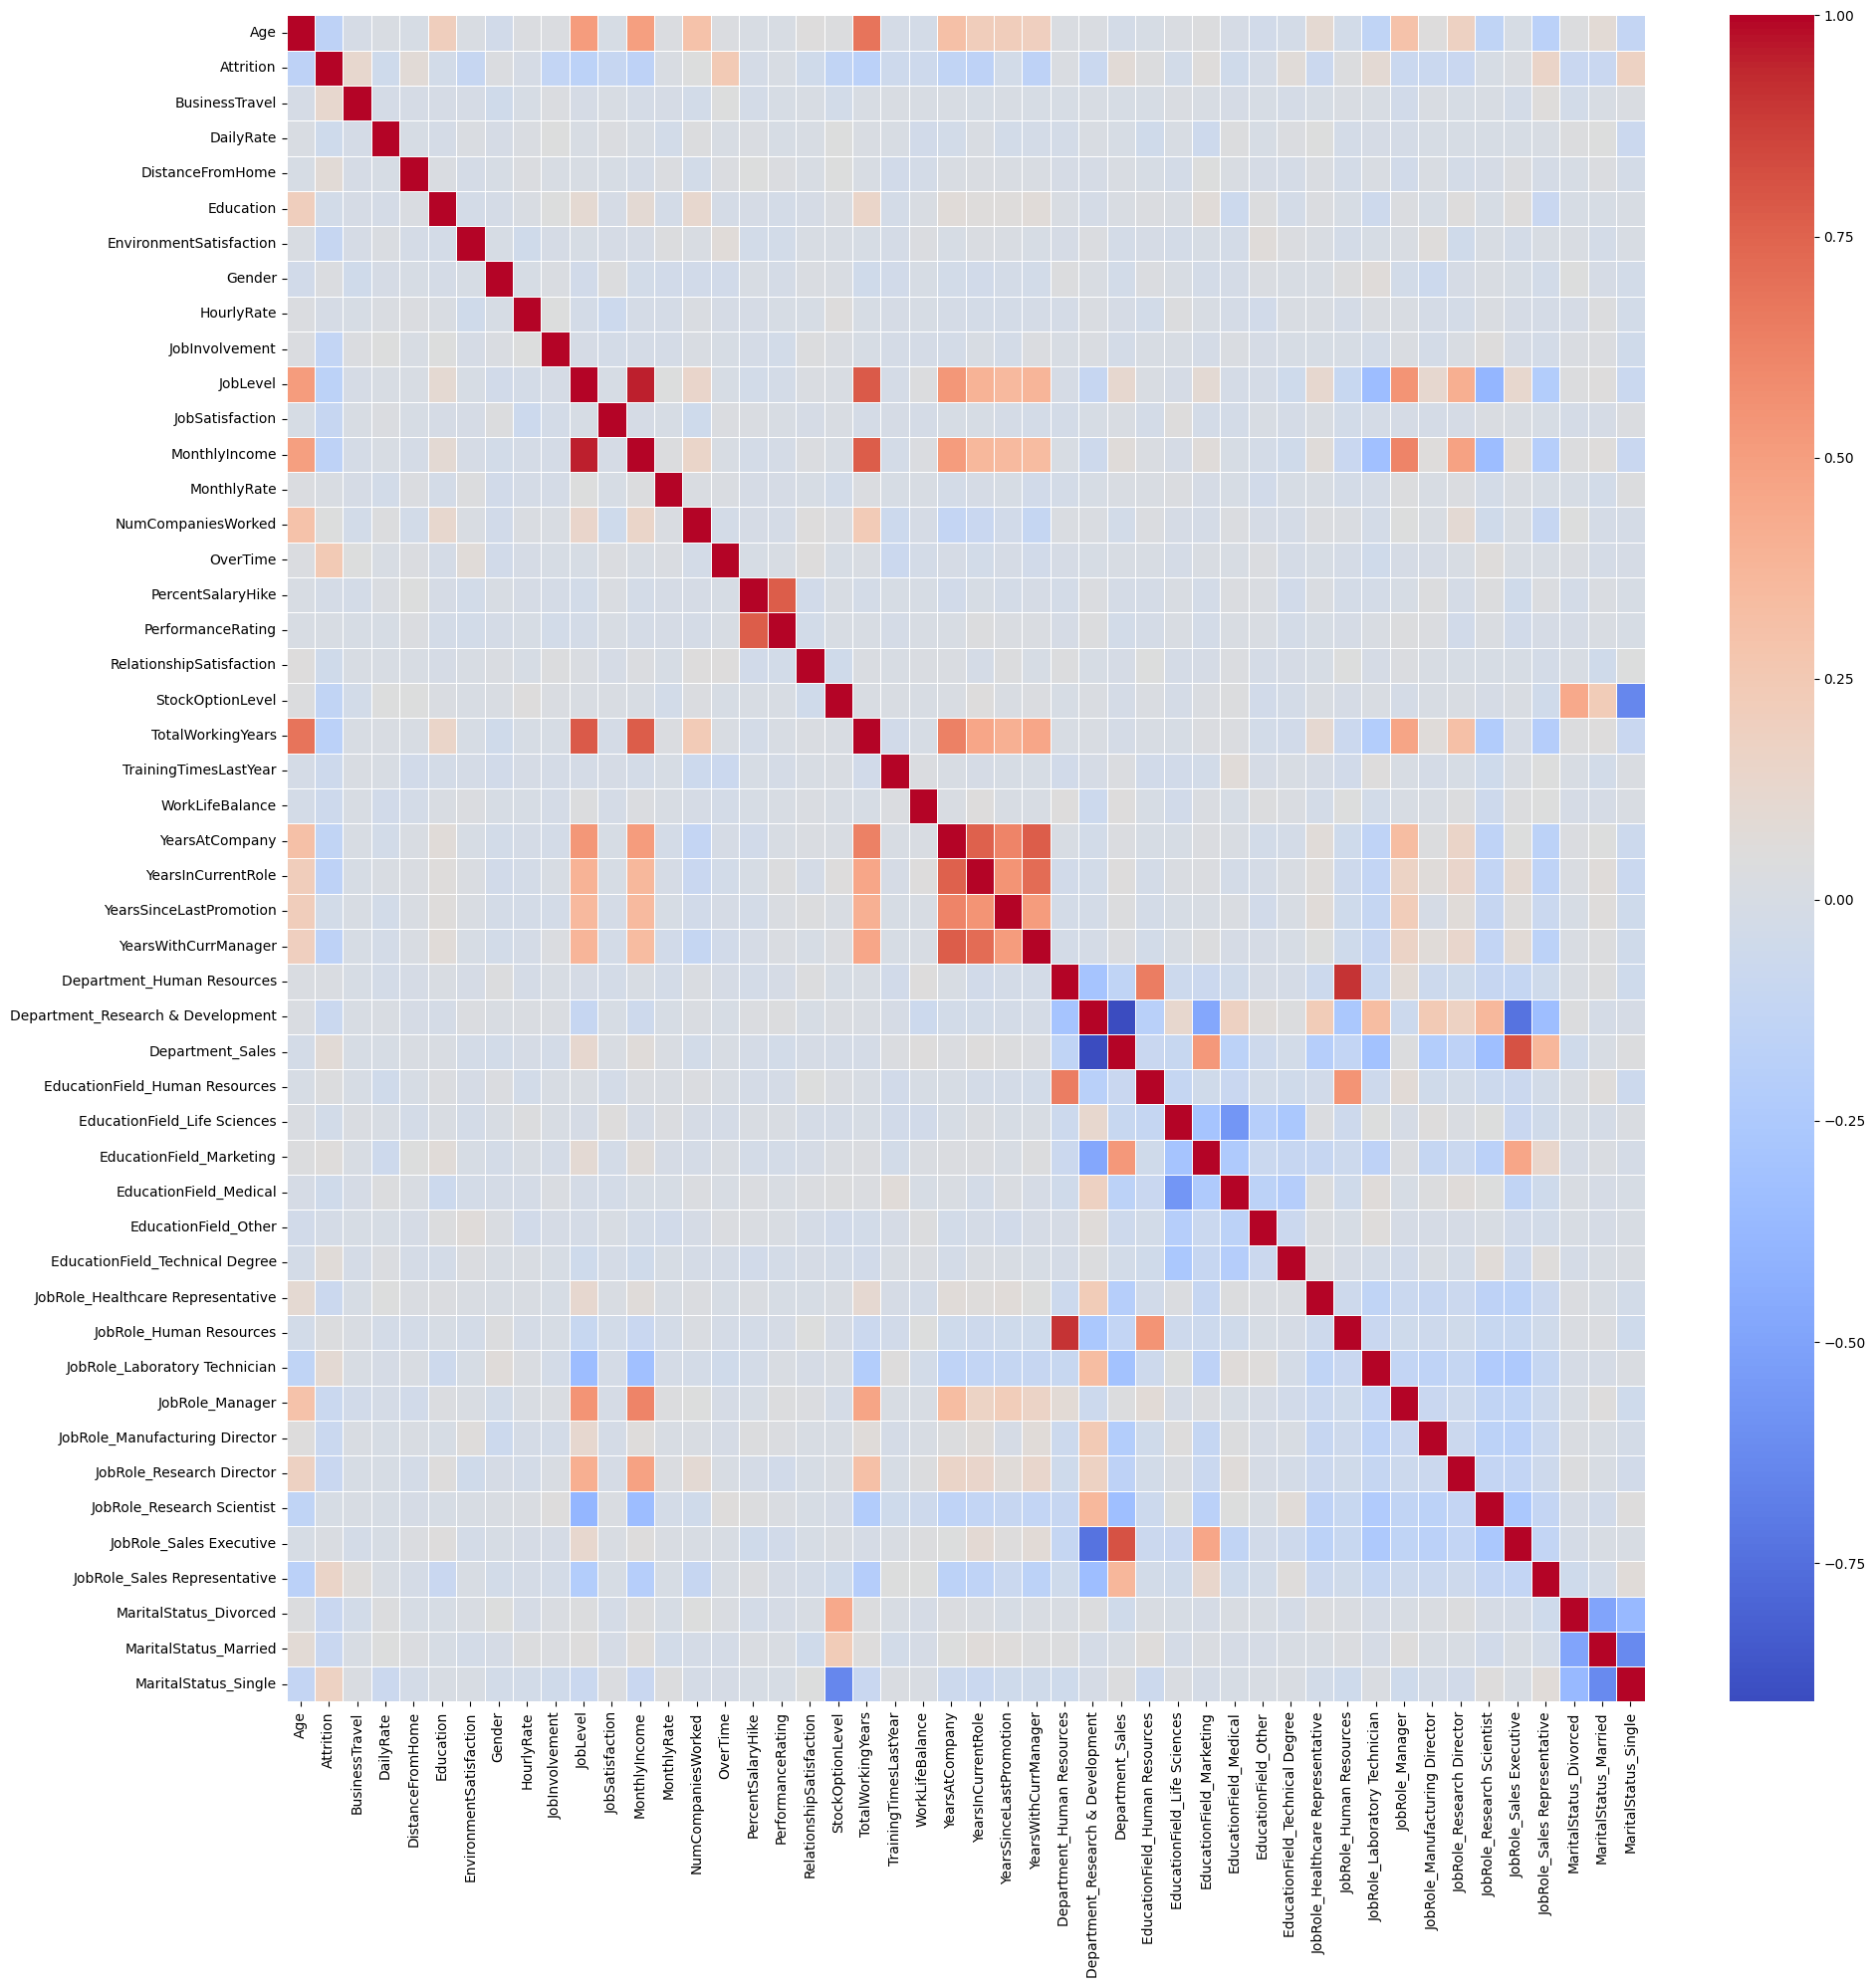

In [9]:
# A good indicator of the influence of a predictor to the output value is the correlation coefficient.
import seaborn as sns

fig = plt.figure(figsize = (22,22))
sns.heatmap(new_df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.show()

In [10]:
corr_matrix = new_df.corr(numeric_only=True)   #building the corr matrix
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel                       0.127006
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other              

In [11]:
# Sorting by correlation with Attrition and select top 15 (excluding Attrition itself)
top_15_features = corr_matrix["Attrition"].abs().sort_values(ascending=False).iloc[1:16]

# Displaying top correlated features
print("Top 15 most correlated features with Attrition:")
print(top_15_features)

Top 15 most correlated features with Attrition:
OverTime                        0.246118
MaritalStatus_Single            0.175419
TotalWorkingYears               0.171063
JobLevel                        0.169105
YearsInCurrentRole              0.160545
MonthlyIncome                   0.159840
Age                             0.159205
JobRole_Sales Representative    0.157234
YearsWithCurrManager            0.156199
StockOptionLevel                0.137145
YearsAtCompany                  0.134392
JobInvolvement                  0.130016
BusinessTravel                  0.127006
JobSatisfaction                 0.103481
EnvironmentSatisfaction         0.103369
Name: Attrition, dtype: float64


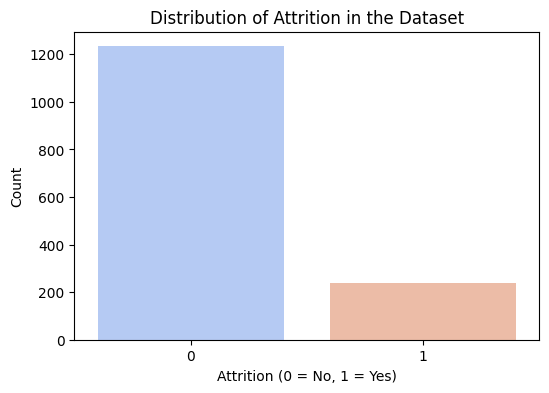

In [12]:
# Plotting the distribution of classes

plt.figure(figsize=(6, 4))
sns.countplot(x = new_df["Attrition"], palette="coolwarm")

# Adding labels and title
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of Attrition in the Dataset")
plt.savefig("attrition_distribution.png", dpi=300, bbox_inches='tight')
# Showing the plot
plt.show()

We can see that we have a highly imbalanced dataset

## Model Building

In [13]:
# Selecting the features to train the models on
selected_features = [
    'OverTime',
    'MaritalStatus_Single',
    'TotalWorkingYears',
    'JobLevel',
    'YearsInCurrentRole',
    'MonthlyIncome',
    'Age',
    'JobRole_Sales Representative',
    'YearsWithCurrManager',
    'StockOptionLevel',
    'YearsAtCompany',
    'JobInvolvement',
    'BusinessTravel',
    'JobSatisfaction',
    'EnvironmentSatisfaction'
]

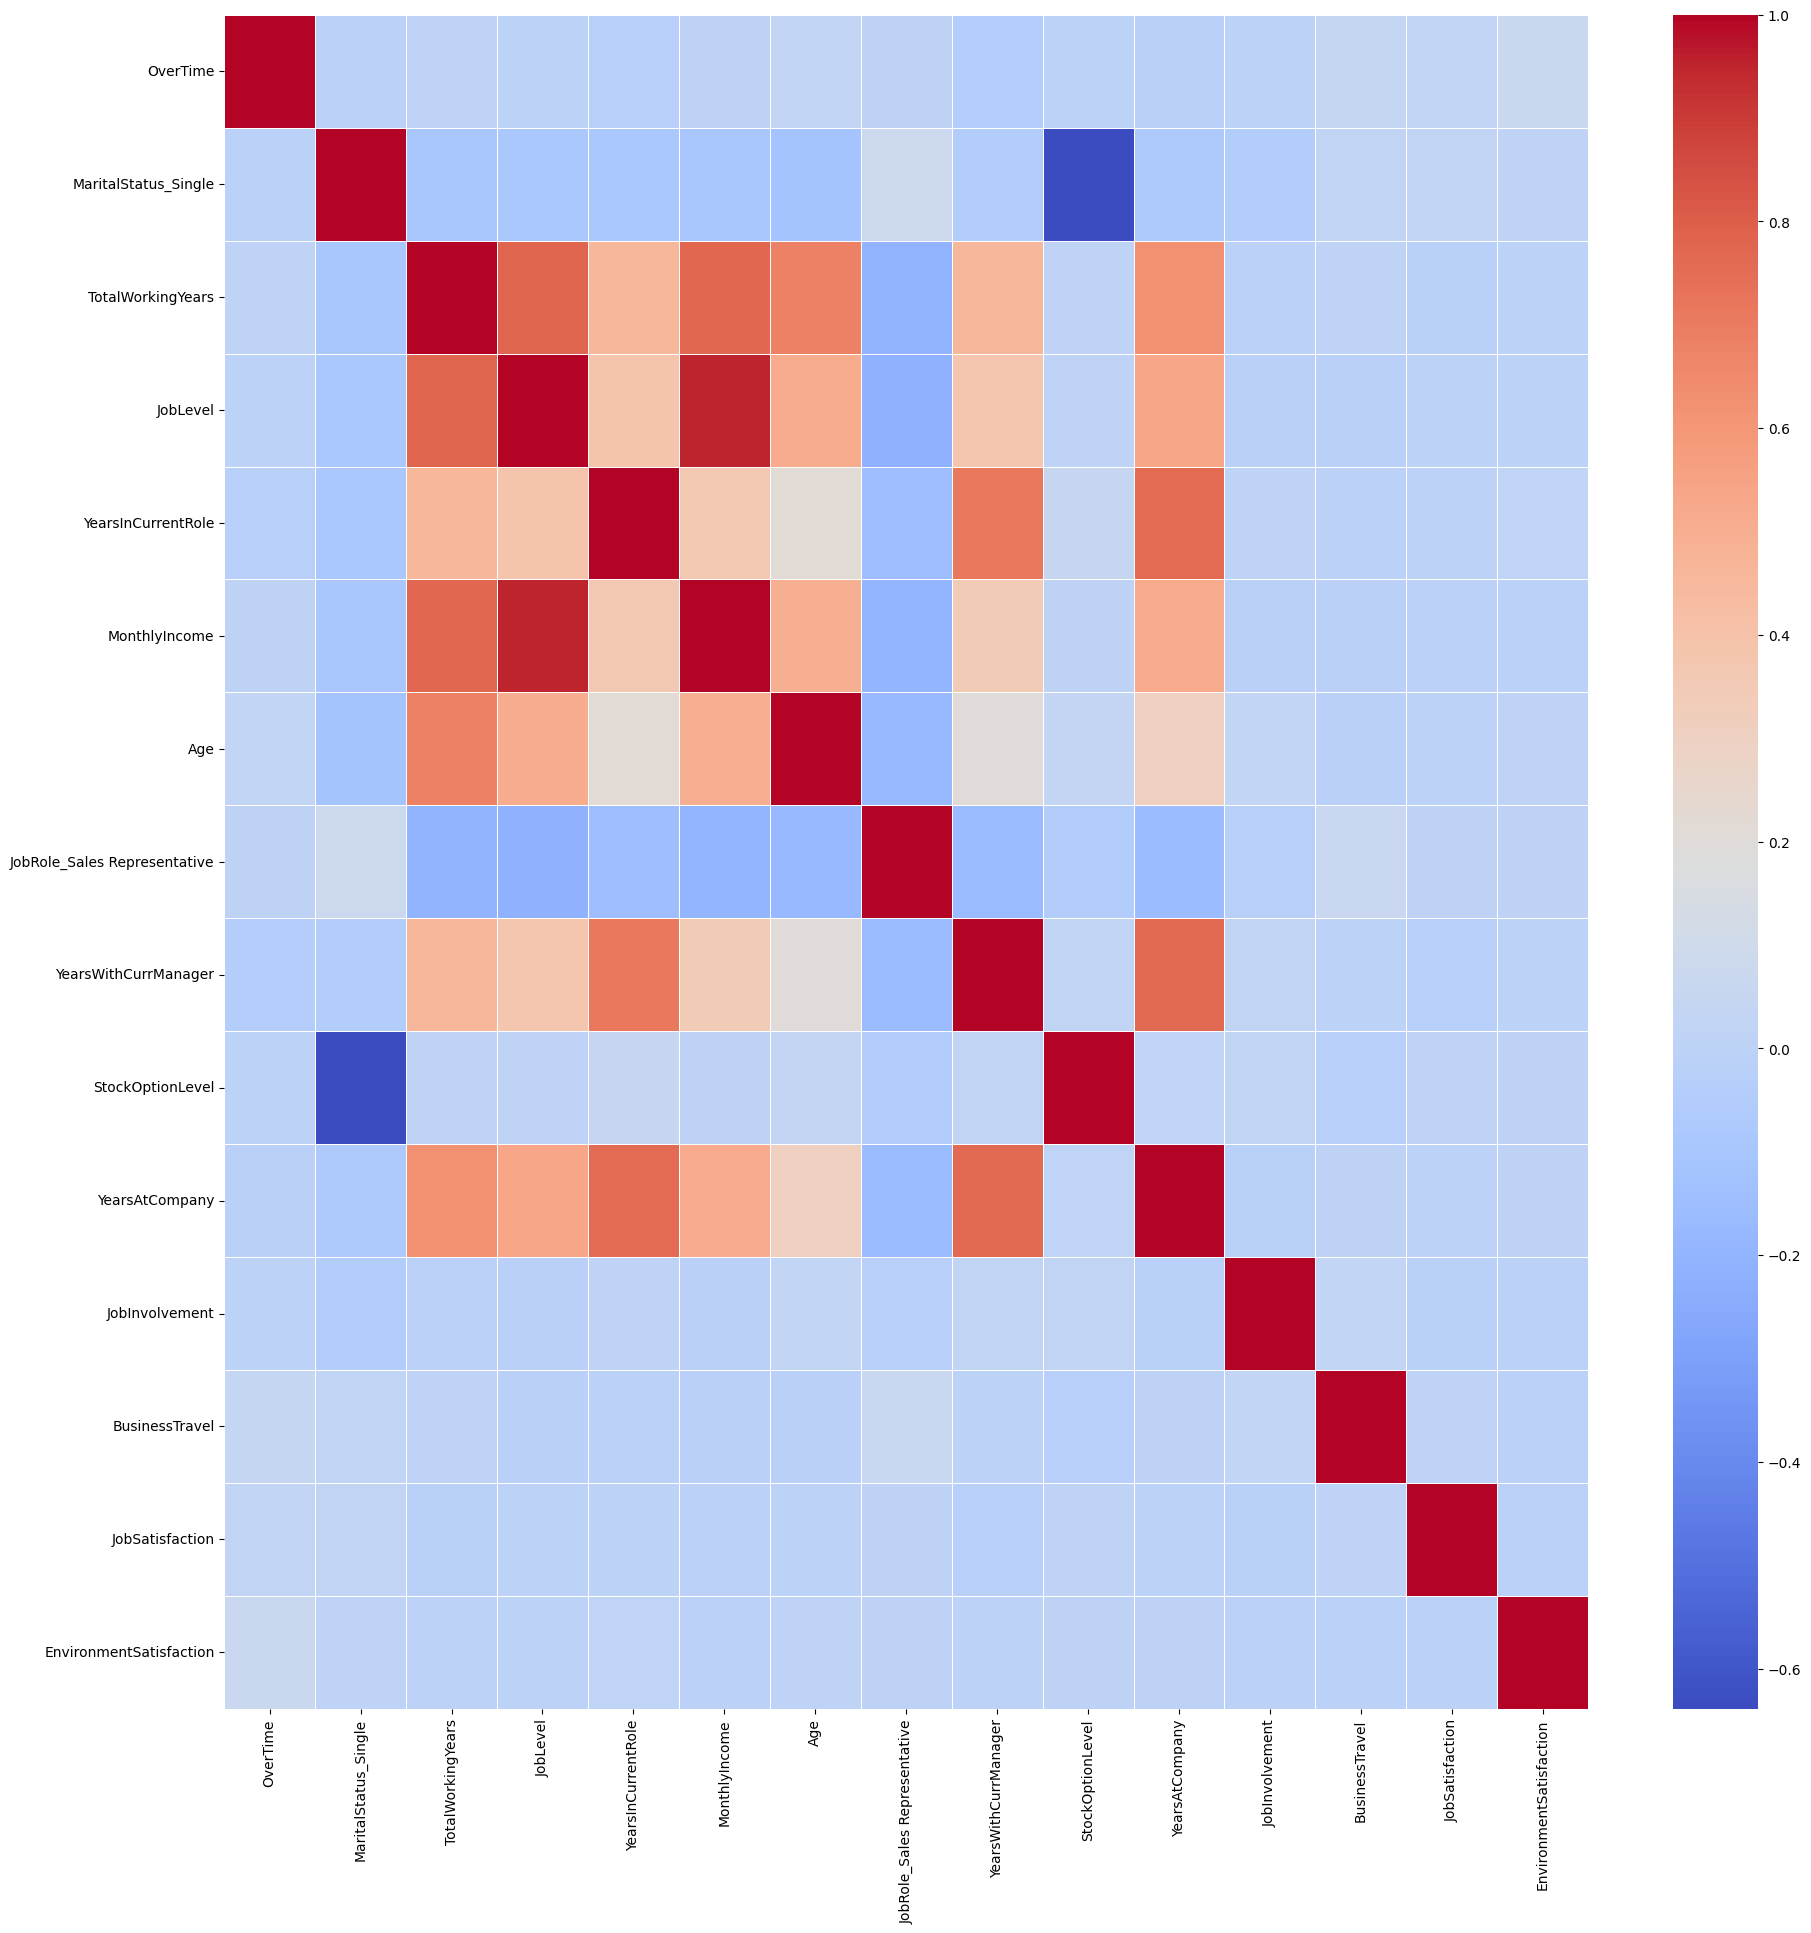

In [14]:
# Plotting the correlation of selected features
fig = plt.figure(figsize = (22,22))
sns.heatmap(new_df[selected_features].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.savefig("sel_features_cor.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Creating Test and Train set
from sklearn.model_selection import train_test_split

X = new_df[selected_features] # Features
y = new_df['Attrition'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)  # stratified splitting

##### Random Forest - Baseline Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Initializing and training the model
rf = RandomForestClassifier(random_state=42,class_weight='balanced') # does not require scaling
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred_rf))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"F1: {f1_score(y_test,y_pred_rf, average= 'macro'):.2f}")

# feature importances
feature_importance_rf = rf.feature_importances_

# Converting to DataFrame
importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_rf})

# Sort by importance
importance_df_rf = importance_df_rf.sort_values(by="Importance", ascending=False)

# Displaying the top features
importance_df_rf.reset_index(drop=True, inplace=True)
print(importance_df_rf)

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       309
           1       0.42      0.14      0.21        59

    accuracy                           0.83       368
   macro avg       0.64      0.55      0.56       368
weighted avg       0.78      0.83      0.79       368

Confusion matrix:
[[298  11]
 [ 51   8]]
F1: 0.56
                         Feature  Importance
0                  MonthlyIncome    0.149520
1                            Age    0.120235
2              TotalWorkingYears    0.101788
3                 YearsAtCompany    0.090296
4           YearsWithCurrManager    0.075885
5                       OverTime    0.064271
6                JobSatisfaction    0.062278
7             YearsInCurrentRole    0.059511
8        EnvironmentSatisfaction    0.059413
9               StockOptionLevel    0.059039
10                JobInvolvement    0.047953
11                      JobLevel    0.040071
12                BusinessTravel    0.

The simple Random Forest on the whole dataset performed poorly with only 0.56 F1 score. In this problem we will track at most the F1 and not accuracy.

##### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr_pipeline = Pipeline([('scaler', MinMaxScaler()),  # making the pipeline
                         ('lr', LogisticRegression(random_state=42,class_weight="balanced"))])
param_grid = {                                # parameters to search
    "lr__C": [0.001, 0.01, 0.1, 1, 10, 100], 
    "lr__penalty": ["l1", "l2"],
    "lr__solver": ["liblinear", "saga"],  
    "lr__max_iter": [100, 500, 1000]
}

lr_model = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1)  # grid searching
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)  # predicting

print(classification_report(y_test, y_pred_lr))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"F1: {f1_score(y_test,y_pred_lr, average= 'macro'):.2f}")

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       309
           1       0.42      0.69      0.53        59

    accuracy                           0.80       368
   macro avg       0.68      0.76      0.70       368
weighted avg       0.85      0.80      0.82       368

Confusion matrix:
[[253  56]
 [ 18  41]]
F1: 0.70


In [18]:
# printing the best params
lr_model.best_params_

{'lr__C': 0.001,
 'lr__max_iter': 100,
 'lr__penalty': 'l2',
 'lr__solver': 'liblinear'}

Here we trained a Logistic Regression with a GridSearchCV for hyperparameter tuning. This model performed a lot of better. We take a look to the coefficients of this model to better understand the drivers

In [19]:
# Checking the Relationships
# (+) coefficients increase the likelihood of Attrition
# (-) coefficients decrease the likelihood of Attrition

coefficients = lr_model.best_estimator_.named_steps['lr'].coef_[0]  # Coefficients of logistic regression
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print(feature_importance)

                         Feature  Coefficient
0                       OverTime     0.072007
1           MaritalStatus_Single     0.058234
12                BusinessTravel     0.027242
7   JobRole_Sales Representative     0.024665
10                YearsAtCompany    -0.016912
11                JobInvolvement    -0.020149
2              TotalWorkingYears    -0.023233
13               JobSatisfaction    -0.023724
4             YearsInCurrentRole    -0.023829
8           YearsWithCurrManager    -0.024384
5                  MonthlyIncome    -0.024777
6                            Age    -0.026231
9               StockOptionLevel    -0.026756
14       EnvironmentSatisfaction    -0.027582
3                       JobLevel    -0.028217


##### XGB Classifier for Selected Features

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=9, random_state=42)
param_grid_xgb = {
    "n_estimators": [100,200, 300],  # selecting parameters for searching
    "max_depth": [ 3, 5,7],  
    "learning_rate": [0.01,0.1, 0.15,0.2],  
    "gamma": [0.01 ,0.1, 0.15,0.2],  
}
xgb = GridSearchCV(
    xgb_model, param_grid_xgb, cv=5, scoring="f1_macro", n_jobs=-1, verbose=1
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred_xgb))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Printing formatted output
print(f"F1: {f1_score(y_test,y_pred_xgb, average= 'macro'):.2f}")


best_xgb = xgb.best_estimator_

feature_importance_x = best_xgb.feature_importances_

# Converting to DataFrame the importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_x})
# Sorting by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
# Displaying the top features
importance_df.reset_index(drop=True, inplace=True)
importance_df

Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       309
           1       0.37      0.56      0.45        59

    accuracy                           0.78       368
   macro avg       0.64      0.69      0.65       368
weighted avg       0.82      0.78      0.79       368

Confusion matrix:
[[253  56]
 [ 26  33]]
F1: 0.65


,Feature,Importance
0,OverTime,0.129352
1,StockOptionLevel,0.107415
2,YearsWithCurrManager,0.071753
3,JobSatisfaction,0.069675
4,EnvironmentSatisfaction,0.065763
5,YearsAtCompany,0.065073
6,JobLevel,0.065059
7,BusinessTravel,0.064730
8,JobInvolvement,0.062809
9,MonthlyIncome,0.058864


##### SVC Model with Selected Features

In [21]:
from sklearn.svm import SVC

# Defining an SVC model with a linear kernel
svc_model = SVC(kernel="linear",probability=True,class_weight = "balanced", random_state=42)

# Defining hyperparameter grid for tuning
param_grid_svc = {
    "svc__C": [0.01, 0.1, 1, 10, 100], 
}

# Creating a pipeline with scaling and SVC
svc_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('svc', svc_model)
])

# Performing Grid Search CV for hyperparameter tuning
svc = GridSearchCV(
    svc_pipeline, param_grid_svc, cv=5, scoring="f1_macro", n_jobs=-1, verbose=1
)

# Training the model
svc.fit(X_train, y_train)

# Making Predictions
y_pred_svc = svc.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred_svc))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print(f"F1: {f1_score(y_test,y_pred_svc, average= 'macro'):.2f}")
best_svc = svc.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       309
           1       0.40      0.73      0.51        59

    accuracy                           0.78       368
   macro avg       0.67      0.76      0.69       368
weighted avg       0.85      0.78      0.80       368

Confusion matrix:
[[244  65]
 [ 16  43]]
F1: 0.69


##### Multilayer Perceptron (MLP)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['recall'])

# Early stopping to avoid overfitting
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fitting the model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[es],
                    verbose=1)

# Evaluating on test data
y_pred_proba = model.predict(X_test_scaled)
y_pred_mlp = (y_pred_proba > 0.50).astype(int)

# Model evaluation
print(classification_report(y_test, y_pred_mlp))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
# Print formatted output
print(f"F1: {f1_score(y_test,y_pred_mlp, average= 'macro'):.2f}")

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5123 - recall: 0.0334 - val_loss: 0.4508 - val_recall: 0.0000e+00
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4033 - recall: 0.0000e+00 - val_loss: 0.4068 - val_recall: 0.0000e+00
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3895 - recall: 0.0150 - val_loss: 0.3935 - val_recall: 0.0500
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3639 - recall: 0.0934 - val_loss: 0.3821 - val_recall: 0.1500
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3623 - recall: 0.1152 - val_loss: 0.3800 - val_recall: 0.2000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3718 - recall: 0.1549 - val_loss: 0.3830 - val_recall: 0.1750
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3630 - recall: 0.1811 - val_loss: 0.3713 - val_recall: 0.3250
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3485 - recall: 0.2935 - val_loss: 0.3793 - val_recall: 0.2750
Epoc

##### Random Forest with SMOTE and Hyperparameter Tuning

In [23]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
# Defining the pipeline
rf_smote_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42,class_weight='balanced'))
])
# Defining the hyperparameter grid
param_grid_rf = {
    'rf__n_estimators': [200, 300, 400],
    'rf__max_depth': [None, 20, 30],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}
# Grid search
grid_rf_smote = GridSearchCV(
    estimator=rf_smote_pipeline,
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fitting only on training data (SMOTE applies here only)
grid_rf_smote.fit(X_train, y_train)

# Evaluating on original test set
y_pred_rf_smote = grid_rf_smote.predict(X_test)

print(classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))
print("F1 Score (macro):", round(f1_score(y_test, y_pred_rf_smote, average='macro'), 2))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       309
           1       0.44      0.47      0.46        59

    accuracy                           0.82       368
   macro avg       0.67      0.68      0.67       368
weighted avg       0.82      0.82      0.82       368

Confusion Matrix:
 [[273  36]
 [ 31  28]]
F1 Score (macro): 0.67


In [24]:
grid_rf_smote.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=300, random_state=42))])

##### Sensitivity Analysis on the best Model

In [26]:
import numpy as np
import pandas as pd

# Copying the test dataset to avoid modifying the original
X_test_copy = X_test.copy()

# Getting predictions (probability of attrition)
predictions = lr_model.predict_proba(X_test_copy)[:, 1]

# Dictionary to store sensitivity results
sensitivity_results = {}

# Looping through all features
for feature in X_test_copy.columns:
    X_modified = X_test_copy.copy()  # Copying the dataset for each feature change
    
    # Changing feature to its mean
    X_modified[feature] = X_modified[feature].mean()
    
    # Getting new predictions after modification
    modified_predictions = lr_model.predict_proba(X_modified)[:, 1]
    
    # Computing absolute change in predictions
    sensitivity = np.abs(predictions - modified_predictions).mean()
    
    # Storing result
    sensitivity_results[feature] = sensitivity

# Converting to DataFrame for visualization
sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Sensitivity'])
sensitivity_df = sensitivity_df.sort_values(by='Sensitivity', ascending=False)

In [27]:
sensitivity_df.sort_values(by="Sensitivity", ascending=False)

,Sensitivity
OverTime,0.006792
MaritalStatus_Single,0.006249
EnvironmentSatisfaction,0.002234
JobSatisfaction,0.001830
JobLevel,0.001550
StockOptionLevel,0.001525
MonthlyIncome,0.001253
BusinessTravel,0.001158
Age,0.001136
YearsInCurrentRole,0.001095


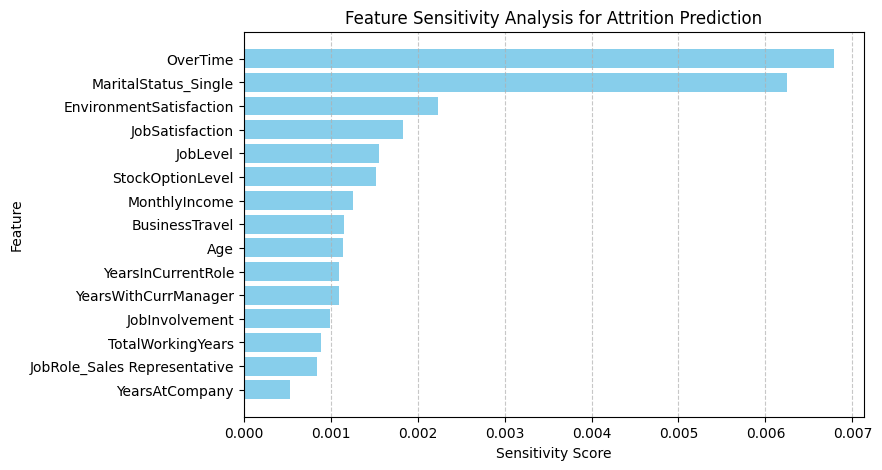

In [28]:
# Plotting the sensitivities plot
plt.figure(figsize=(8, 5))
plt.barh(sensitivity_df.index[::-1], sensitivity_df['Sensitivity'][::-1], color='skyblue')
plt.xlabel("Sensitivity Score")
plt.ylabel("Feature")
plt.title("Feature Sensitivity Analysis for Attrition Prediction")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### Retraining the model on the whole dataset and save it in order to proceed with the API

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])
best_params = lr_model.best_params_
best_params = {k.replace("lr__", ""): v for k, v in lr_model.best_params_.items()}
final_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(**best_params, random_state=42, class_weight="balanced"))
])

cv_scores = cross_val_score(final_pipeline, X_full, y_full, cv=5, scoring="f1_macro")
final_pipeline.fit(X_full,y_full)
print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1: {cv_scores.mean():.3f}, Std: {cv_scores.std():.3f}")


Saving

In [ ]:
import joblib

# Saving the entire trained pipeline
joblib.dump(final_pipeline, 'final_lr_pipeline.pkl')

# Saving feature columns
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_columns.pkl')
